## Moving Averages

#### SMA
- Calculated by (sum of the an asset price over the past n periods) / (number of periods)
- Often used to identify trend direction

In [1]:
# https://towardsdatascience.com/making-a-trade-call-using-simple-moving-average-sma-crossover-strategy-python-implementation-29963326da7a

import pandas as pd
import datetime
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
import talib as ta
import numpy as np 
from talib import abstract
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import pandas_datareader.data as web
import yfinance as yf
import mplfinance as fplt
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.animation as animation
import time

In [2]:
#getting data
#any stock ticker
ticker = 'SQQQ'
# 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
period = '1d'
# 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
interval = '5m'

In [3]:
#import time
#while True:
    #time.sleep(300)
data = yf.Ticker(ticker).history(period=period,interval=interval)

In [4]:
print(df.iloc[:,:0])

NameError: name 'df' is not defined

In [5]:
df2['Datetime'] = pd.to_datetime(df2['Datetime'], format='%Y-%m-%d %H:%M:%S.%f')
df2['date'] = df2['Datetime'].dt.date
df2['time'] = df2['Datetime'].dt.time
print(df2)

NameError: name 'df2' is not defined

In [13]:
import mplfinance as fplt

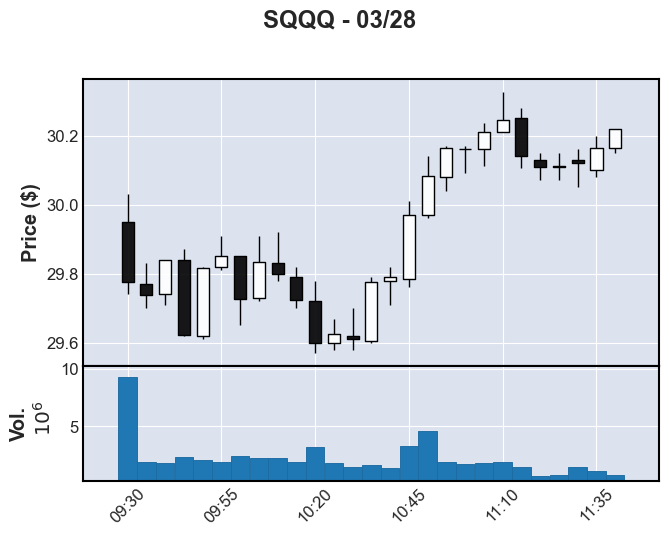

In [9]:
# https://coderzcolumn.com/tutorials/data-science/candlestick-chart-in-python-mplfinance-plotly-bokeh#1 

chart = fplt.plot(
    data_whole,
    type='candle',
    title='SQQQ - 03/28',
    ylabel='Price ($)',
    volume=True,
    ylabel_lower='Vol.',
)

In [10]:
import plotly

print("Plotly Version : {}".format(plotly.__version__))

Plotly Version : 5.9.0


### Calculating Moving Averages

In [81]:
#20 day simple moving avg
data_whole['SMA20'] = data_whole['Close'].rolling(window=20, min_periods=1).mean()
#50 day simple moving avg
data_whole['SMA100'] = data_whole['Close'].rolling(window=100, min_periods=1).mean()   

data_whole.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,SMA20,SMA100
Datetime,,,,,,,,,,
2023-04-03 09:30:00-04:00,29.950001,30.030001,29.740000,29.775000,9310747,0.0,0.0,0.0,29.775000,29.775000
2023-04-03 09:35:00-04:00,29.770000,29.830000,29.700001,29.738001,1836467,0.0,0.0,0.0,29.756500,29.756500
2023-04-03 09:40:00-04:00,29.740000,29.840000,29.709999,29.839800,1774473,0.0,0.0,0.0,29.784267,29.784267
2023-04-03 09:45:00-04:00,29.840000,29.870001,29.620001,29.621300,2269793,0.0,0.0,0.0,29.743525,29.743525
2023-04-03 09:50:00-04:00,29.620001,29.820000,29.610001,29.815001,2034102,0.0,0.0,0.0,29.757820,29.757820


## Crossovers
- A crossover occurs when a faster MA crosses over a slower MA
    - This meeting point can be used as a potientional indicator to buy/sell
- When short-term MA crosses above the long-term MA, **buy signal**.</br>
- Vice versa, for **sell signal**.

In [132]:
data.dtypes

Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Dividends        float64
Stock Splits     float64
Capital Gains    float64
dtype: object

In [153]:
df['SMA200'] = ta.SMA(df['Close'],200)
df['SMA100'] = ta.SMA(df['Close'],100)
df['SMA20'] = ta.SMA(df['Close'],20)


https://www.freecodecamp.org/news/how-to-create-auto-updating-data-visualizations-in-python-with-matplotlib-and-aws/
https://algorithmictrading.substack.com/p/trading-with-the-average-directional

***

[*********************100%***********************]  1 of 1 completed


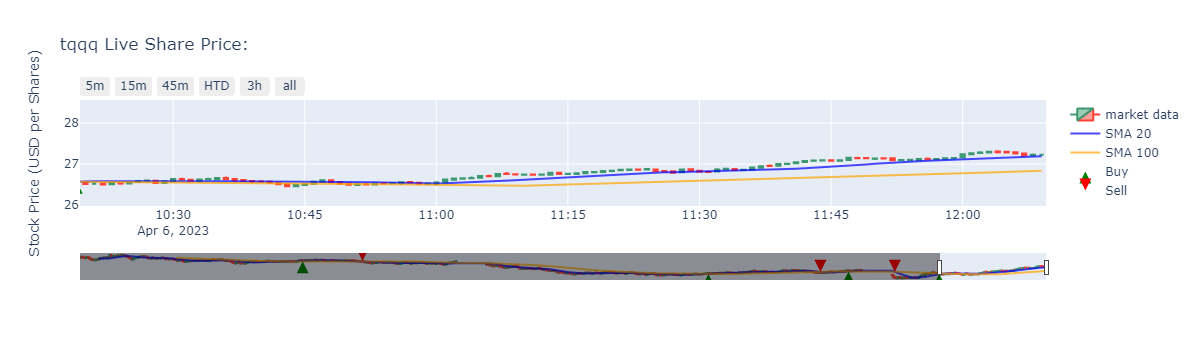

In [10]:
# https://medium.com/@jsteinb/python-adding-features-to-your-stock-market-dashboard-with-plotly-4208d8bc3bd5
# Create input field for our desired stock 
#stock=input("Enter a stock ticker symbol: ")
stock = 'tqqq'

# Retrieve stock data frame (df) from yfinance API at an interval of 1m 
df = yf.download(tickers=stock,period='3d',interval='1m')
df2 = pd.DataFrame(df)
df2 = df2.to_csv(f'{stock}.csv')
df2 = pd.read_csv(f'{stock}.csv')

#df2['Datetime'] = pd.to_datetime(df2['Datetime'], format='%Y-%m-%d %H:%M:%S.%f')
#df2['date'] = df2['Datetime'].dt.date
#df2['time'] = df2['Datetime'].dt.time
#print(df2)

#df2.index.name = 'Datetime'

# Declare plotly figure (go)
fig=go.Figure()

fig.add_trace(go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'], name = 'market data'))
# MA
df['SMA20'] = df['Close'].rolling(window=20).mean() 
df['SMA100'] = df['Close'].rolling(window=100).mean()
df['SMA200'] = df['Close'].rolling(window=200).mean()

# Add 20-day Moving Average Trace
fig.add_trace(go.Scatter(x=df.index, 
                         y=df['SMA20'], 
                         opacity=0.7, 
                         line=dict(color='blue', width=2), 
                         name='SMA 20'))
# Add 100-day Moving Average Trace
fig.add_trace(go.Scatter(x=df.index, 
                         y=df['SMA100'], 
                         opacity=0.7, 
                         line=dict(color='orange', width=2), 
                         name='SMA 100'))
# https://plotly.com/python/marker-style/
# https://towardsdatascience.com/making-a-trade-call-using-simple-moving-average-sma-crossover-strategy-python-implementation-29963326da7a

#adding signals
df['Signal'] = 0.0
df['Signal'] = np.where(df['SMA20'] > df['SMA100'], 1.0, 0.0)
df['Position'] = df['Signal'].diff()

fig.add_trace(go.Scatter(x=df[df['Position'] == 1].index,
                         y=df['SMA20'][df['Position']== 1],
                         name='Buy',
                         mode='markers',
                         marker = dict(symbol = 'arrow-up', color = 'green', size = 12),
                         ))

fig.add_trace(go.Scatter(x=df[df['Position'] == -1].index,
                         y=df['SMA20'][df['Position']== -1],
                         name='Sell',
                         mode='markers',
                         marker = dict(symbol = 'arrow-down', color = 'red', size = 12),
                         ))            
                                
fig.update_layout(
    title= str(stock)+' Live Share Price:',
    yaxis_title='Stock Price (USD per Shares)')               

fig.update_shapes(dict(xref='x', yref='y'))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=5, label="5m", step="minute", stepmode="backward"),
            dict(count=15, label="15m", step="minute", stepmode="backward"),
            dict(count=45, label="45m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(count=3, label="3h", step="hour", stepmode="backward"),
            dict(step="all")
        ])
        ),
    
    #figure out how to not effect yaxis
    rangebreaks=[
        dict(bounds=[16,9], pattern='hour'),
    ]
)

fig.show()

When position = 1, it implied that Signal has changed from 0 to 1 
    - Short-term(faster) MA has crossed above the long-term(slower) MA, triggereing a **buy** call

When postion -1, it implies that Signal has changed from 1 to 0
    - Short-term(faster) MA has crossed below the long-term(slower) MA, triggering a **sell** call

In [15]:
print(df2.index)

RangeIndex(start=0, stop=1652, step=1)


Enter a stock ticker symbol:  sqqq


[*********************100%***********************]  1 of 1 completed


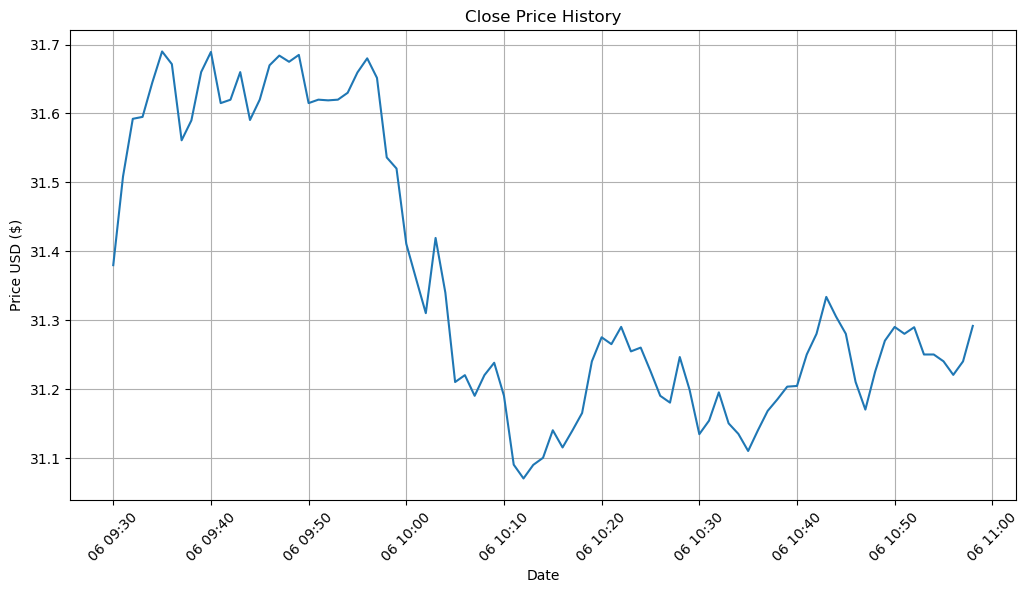

How many periods for SMA?:  20
How many periods for EMA?:  30


ValueError: passed window 20 is not compatible with a datetimelike index

In [7]:
# https://github.com/AgentZero2483/Algorithm-Trading/blob/main/Algotrading.ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import datetime

stock=input("Enter a stock ticker symbol: ")

# Retrieve stock data frame (df) from yfinance API at an interval of 1m 
df = yf.download(tickers=stock,period='1d',interval='1m')
df = pd.DataFrame(df)
df = df.to_csv(f'{stock}.csv')
df = pd.read_csv(f'{stock}.csv', parse_dates=True, index_col=[0])

# df = df.set_index(pd.DatetimeIndex(df['Datetime'].values))
#date: 2010-06-29 - 2020-02-03

#Show stock price
plt.figure(figsize=(12.2, 6.1))
plt.plot(df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.grid(True)
plt.show()


sma_period = input('How many periods for SMA?: ')
ema_period = input('How many periods for EMA?: ')
#Create functions to calculate indicators
#SMA Simple Moving Average Common time periods: (15, 30, 50, 100, 200)
def SMA(data, period=sma_period, column='Close'):
    return data[column].rolling(window=sma_period).mean()
    #rolling provides rolling window calculations.

#EMA Exponential Moving Average
def EMA(data, period=ema_period, column='Close'):
    return data[column].ewm(span=ema_period, adjust=False).mean()
    #EW (exponential weighted  functions).
    #Available EW functions: mean(), var(), std(), corr(), cov().

#EMA_Longterm Exponential Moving Average
def EMA_Long(data, period=200, column='Close'):
    return data[column].ewm(span=period, adjust=False).mean()

#Create function to compute RSI (Relative Strength Index)
def RSI(data, period=14, column='Close'):
    delta=data[column].diff(1)
    #diff used to find descrete difference over the column axis with a period volue = to 1(whatever is inside)
    delta = delta[1:] #gets rid of first row
    up = delta.copy() #makes copy of objects indecies and data
    down = delta.copy()
    up[up<0]=0
    down[down>0]=0
    data['up'] = up
    data['down'] = down
    AVG_Gain = SMA(data, period, column = 'up')
    AVG_Loss = abs(SMA(data, period, column = 'down'))
    RS = AVG_Gain / AVG_Loss
    RSI = 100.0 - (100.0/(1.0 + RS))
    
    data['RSI'] = RSI
    
    return data


#Create data set
RSI(df)
df['SMA'] = SMA(df)
df['EMA'] = EMA(df)
df['EMA_Longterm'] = EMA_Long(df)

#Plot our SMA chart
#Create a list of columns to keep
SMA_columnlist = ['SMA', 'Close']
df[SMA_columnlist].plot(figsize=(12.8, 6.4 ))
plt.title(f'SMA for {ticker}')
plt.ylabel('USD Price ($)')
plt.xlabel('Date')
plt.grid(True)
plt.show()
#The key points of reference are when the SMA crosses over the pricing candlesticks. 
#If prices are going up and a crossover occurs, that is viewed as a “Buy” signal, and vice-versa. An SMA is often “teamed” with a faster or slower SMA. 
#In these cases, the crossovers of the SMA lines become a key point of reference.


#Plot our EMA chart
#Create a list of columns to keep
EMA_columnlist = ['EMA', 'EMA_Longterm', 'Close']
df[EMA_columnlist].plot(figsize=(12.8, 6.4 ))
plt.title(f'EMA for {ticker}')
plt.ylabel('USD Price ($)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

#Plot our RSI chart
#Create a list of columns to keep
RSI_columnlist = ['RSI']
df[RSI_columnlist].plot(figsize=(12.8, 6.4 ))
plt.axhline(y = 30, label='Oversold', color = 'green', linestyle = '-')
plt.axhline(y = 70, label='Overbought', color = 'red', linestyle = '-')
plt.title(f'RSI for {ticker}')
plt.ylabel('USD Price ($)')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

#Calculate MACD and Signal line indicators
#Calculate Shorterm EMA
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
#Calculate the Longterm EMA
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
#Calculate Moving average convergence/Divergence
MACD = (ShortEMA - LongEMA)
#Calculate Signal line
signal= MACD.ewm(span=9, adjust=False).mean()

#Plot Our MACD chart
plt.figure(figsize=(12.2, 6.1))
plt.xticks(rotation=45)
plt.plot(df.index, MACD, label = f'{ticker} MACD', color = 'red')
plt.plot(df.index, signal, label = 'Signal', color = 'green')
plt.legend(loc='upper left')
plt.title(f'MACD For {ticker}')
plt.grid(True)
plt.show()

#Create new columns for data
df['MACD'] = MACD
df['Signal Line'] = signal
#Show
df

#Create function when to buy and sell an asset
def buy_sell(signal):
  buy = []
  sell = []
  flag = -1 
  #Tells if price after crossing a specific point rises or decreases. only changes when momentum shift
  
  for i in range(0, len(signal)): #loop through data and go through each row so we can tell when MACD crosses our signal line
    if signal['MACD'][i] > signal['Signal Line'][i]: #Checks if MACD at position i is greater than the signal line at position i
      sell.append(np.nan) #if true append an nan to our sell list
      if flag != 1: #if our flag number is not = 1 we have not been here before
        buy.append(signal['Close'][i]) #Since we have not been here before append the close price at position i
        flag = 1 #set our flag = 1 meaning that we now have been here before
      else:
        buy.append(np.nan) #if we have been here append a nan to our buy list

    elif signal['MACD'][i] < signal['Signal Line'][i]: #Checks if MACD at position i is less than the signal line at position i
      buy.append(np.nan) #if true append an nan to our buy list
      if flag != 0: #if our flag number is not = 0 we have not been here before
        sell.append(signal['Close'][i]) #since we have not been here before we must append our close price at i to our sell list
        flag = 0 #set our flag = 0 meaning we now have been here
      else:
        sell.append(np.nan) #if we have been here append a nan to our buy list


    else: #if anything else append a nan value to both our buy and sell lists
      buy.append(np.nan) 
      sell.append(np.nan)

  return(buy, sell) #return out buy and sell lists

#create a buy and sell column
a = buy_sell(df)
df['Buy_Price'] = a[0]
df['Sell_Price'] = a[1]

#show data
df

#Show stock buy and sell signals visually
plt.figure(figsize=(12.2, 6.1))
plt.xticks(rotation=45)
plt.scatter(df.index, df['Buy_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell_Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(df['Close'], label='Close Price', alpha=0.35)
plt.title('Closing Buy & Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [12]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import pandas_datareader as web
from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

In [13]:
def pythag(pt1, pt2):
    a_sq = (pt2[0] - pt1[0]) ** 2
    b_sq = (pt2[1] - pt1[1]) ** 2
    return sqrt(a_sq + b_sq)

In [14]:
def regression_ceof(pts):
    X = np.array([pt[0] for pt in pts]).reshape(-1, 1)
    y = np.array([pt[1] for pt in pts])
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0], model.intercept_

In [15]:
def local_min_max(pts):
    local_min = []
    local_max = []
    prev_pts = [(0, pts[0]), (1, pts[1])]
    for i in range(1, len(pts) - 1):
        append_to = ''
        if pts[i-1] > pts[i] < pts[i+1]:
            append_to = 'min'
        elif pts[i-1] < pts[i] > pts[i+1]:
            append_to = 'max'
        if append_to:
            if local_min or local_max:
                prev_distance = pythag(prev_pts[0], prev_pts[1]) * 0.5
                curr_distance = pythag(prev_pts[1], (i, pts[i]))
                if curr_distance >= prev_distance:
                    prev_pts[0] = prev_pts[1]
                    prev_pts[1] = (i, pts[i])
                    if append_to == 'min':
                        local_min.append((i, pts[i]))
                    else:
                        local_max.append((i, pts[i]))
            else:
                prev_pts[0] = prev_pts[1]
                prev_pts[1] = (i, pts[i])
                if append_to == 'min':
                    local_min.append((i, pts[i]))
                else:
                    local_max.append((i, pts[i]))
    return local_min, local_max

In [16]:
# Create input field for our desired stock 
# stock=input("Enter a stock ticker symbol: ")
stock = 'tqqq'
# Retrieve stock data frame (df) from yfinance API at an interval of 1m 
df = yf.download(tickers=stock,period='1d',interval='1m')
df = pd.DataFrame(df)

Enter a stock ticker symbol:  tqqq


[*********************100%***********************]  1 of 1 completed


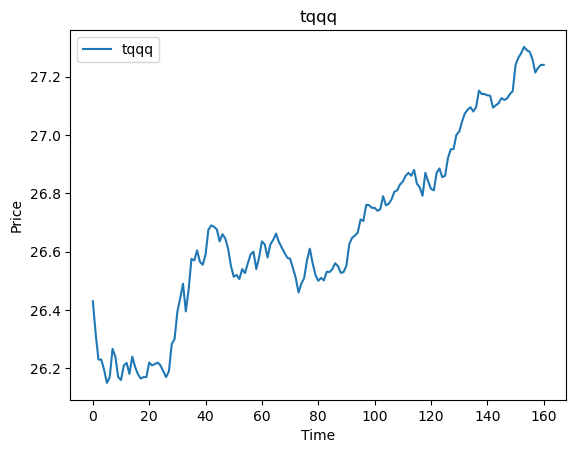

In [17]:
series = df['Close']
series.index = np.arange(series.shape[0])
plt.title(stock)
plt.xlabel('Time')
plt.ylabel('Price')
plt.plot(series, label=stock)
plt.legend()

In [18]:
month_diff = series.shape[0] // 30
if month_diff == 0:
    month_diff = 1
month_diff

5

In [19]:

smooth = int(2 * month_diff + 3)
smooth

13

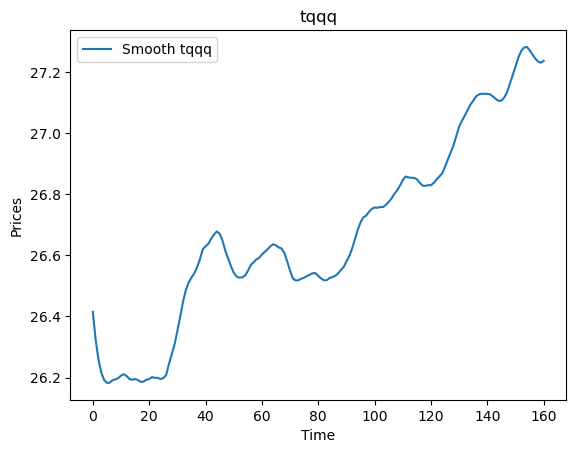

In [20]:
pts = savgol_filter(series, smooth, 3)
plt.title(stock)
plt.xlabel('Time')
plt.ylabel('Prices')
plt.plot(pts, label=f'Smooth {stock}')
plt.legend()

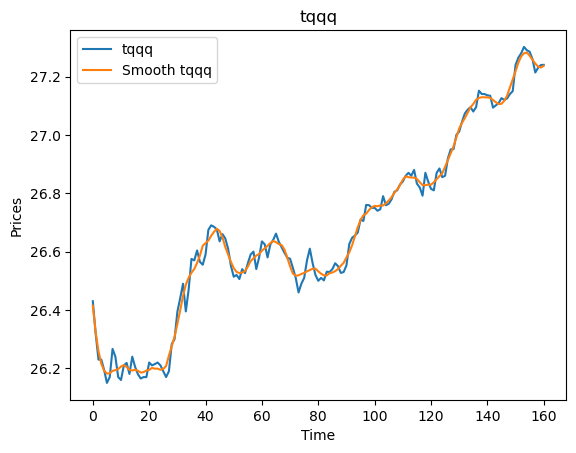

In [23]:
plt.title(stock)
plt.xlabel('Time')
plt.ylabel('Prices')
plt.plot(series, label=stock)
plt.plot(pts, label=f'Smooth {stock}')
plt.legend()

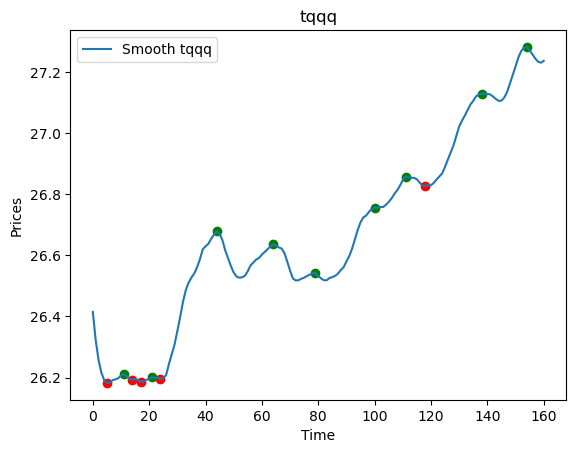

In [24]:
local_min, local_max = local_min_max(pts)
plt.title(stock)
plt.xlabel('Time')
plt.ylabel('Prices')
plt.plot(pts, label=f'Smooth {stock}')
for pt in local_min:
    plt.scatter(pt[0], pt[1], c='r')
for pt in local_max:
    plt.scatter(pt[0], pt[1], c='g')
plt.legend()

In [25]:
local_min_slope, local_min_int = regression_ceof(local_min)
local_max_slope, local_max_int = regression_ceof(local_max)
support = (local_min_slope * np.array(series.index)) + local_min_int
resistance = (local_max_slope * np.array(series.index)) + local_max_int

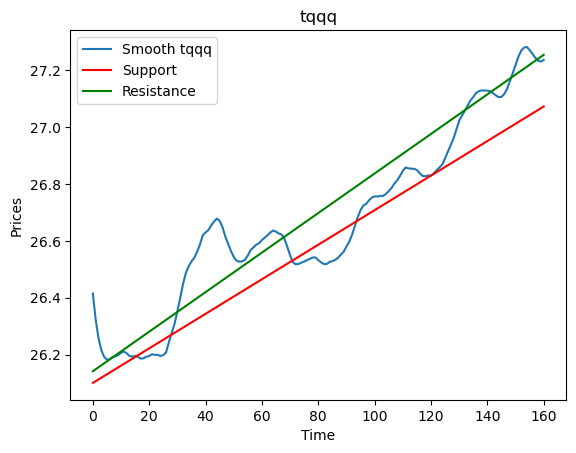

In [26]:
plt.title(stock)
plt.xlabel('Time')
plt.ylabel('Prices')
plt.plot(pts, label=f'Smooth {stock}')
plt.plot(support, label='Support', c='r')
plt.plot(resistance, label='Resistance', c='g')
plt.legend()

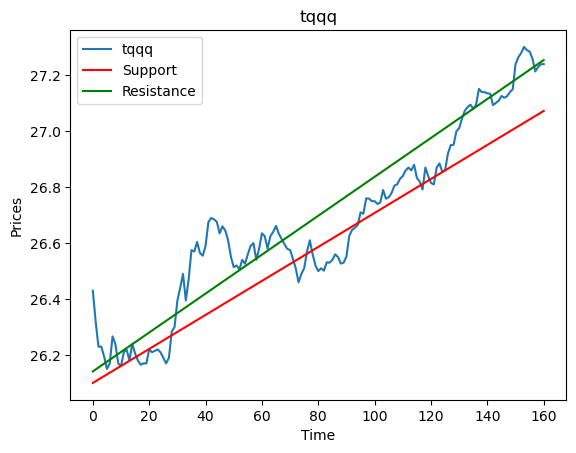

In [27]:
plt.title(stock)
plt.xlabel('Time')
plt.ylabel('Prices')
plt.plot(series, label=stock)
plt.plot(support, label='Support', c='r')
plt.plot(resistance, label='Resistance', c='g')
plt.legend()

***

### Ideas:
- Market sector analysis to find the hottest, most undervalues, most valued sectors
-
-
-
